In [4]:
# 4. Data Preprocessing:

# Generate the summary on missing values
# Document any inconsistencies and potential outliers
# Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers.

In [1]:
# import key dependencies
import pandas as pd
import numpy as np
import sqlite3
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Data integration - read data for pre-processing
sqlite_db = r"D:\git_repo_IO_mini_project1\IOD_mini_project1\preprocess_db.sqlite" # rename root directory to your own directory
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()
tableName_regions = "regions"
tableName_provinces = "provinces"
tableName_merged_report = "merged_report"
tableName_report_total = "reports_total"

In [3]:
# Read tables from database
df_region = pd.read_sql_query("SELECT * FROM "+tableName_regions,conn)
df_region.set_index("index",inplace=True)
df_provinces = pd.read_sql_query("SELECT * FROM "+tableName_provinces,conn)
df_provinces.set_index("index",inplace=True)
df_merged_report = pd.read_sql_query("SELECT * FROM "+tableName_merged_report,conn)
df_merged_report.set_index("index",inplace=True)
df_reports_total = pd.read_sql_query("SELECT * FROM "+tableName_report_total,conn)
df_reports_total.set_index("index",inplace=True)

In [4]:
df_merged_report.head()

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
0,2023-03-09,209451,7896,0,0,0,0,2023-03-10 04:21:03,201555,0,0.0377,AFG,Afghanistan,,33.9391,67.7100
1,2023-03-09,334457,3598,0,14,0,0,2023-03-10 04:21:03,330859,14,0.0108,ALB,Albania,,41.1533,20.1683
2,2023-03-09,271496,6881,0,2,0,0,2023-03-10 04:21:03,264615,2,0.0253,DZA,Algeria,,28.0339,1.6596
3,2023-03-09,47890,165,0,0,0,0,2023-03-10 04:21:03,47725,0,0.0034,AND,Andorra,,42.5063,1.5218
4,2023-03-09,105288,1933,0,0,0,0,2023-03-10 04:21:03,103355,0,0.0184,AGO,Angola,,-11.2027,17.8739


In [5]:
dict(df_merged_report["iso"].value_counts())
df_merged_report[df_merged_report["iso"]=="TWN"]

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
663,2023-03-09,9970937,17672,0,0,0,0,2023-03-10 04:21:03,9953265,0,0.0018,TWN,Taiwan*,,23.7000,121.0000


In [6]:
# suppose we want to explore of ISO == 'CHN'
df_CHN = df_merged_report[df_merged_report["iso"]=="CHN"]
# check for null values
print(df_CHN.isna().value_counts())
df_CHN[df_CHN["lat"].isna()]

date   confirmed  deaths  recovered  confirmed_diff  deaths_diff  recovered_diff  last_update  active  active_diff  fatality_rate  iso    name   province  lat    long 
False  False      False   False      False           False        False           False        False   False        False          False  False  False     False  False    33
                                                                                                                                                           True   True      1
Name: count, dtype: int64


,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
141,2023-03-09,1521816,82195,0,0,0,0,2023-03-10 04:21:03,1439621,0,0.054,CHN,China,Unknown,None,None


In [7]:
# drop row because its an unknown province
df_CHN = df_CHN.dropna()
print(df_CHN.isna().value_counts())

date   confirmed  deaths  recovered  confirmed_diff  deaths_diff  recovered_diff  last_update  active  active_diff  fatality_rate  iso    name   province  lat    long 
False  False      False   False      False           False        False           False        False   False        False          False  False  False     False  False    33
Name: count, dtype: int64


In [8]:
# summary statistic
df_CHN.describe()

,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate
count,3.300000e+01,33.000000,33.0,33.0,33.000000,33.0,3.300000e+01,33.000000,33.000000
mean,1.024760e+05,571.545455,0.0,0.0,0.030303,0.0,1.019045e+05,-0.030303,0.004006
std,4.984635e+05,2445.250755,0.0,0.0,0.174078,0.0,4.961338e+05,0.174078,0.012132
min,7.820000e+02,0.000000,0.0,0.0,0.000000,0.0,7.820000e+02,-1.000000,0.000000
25%,3.423000e+03,2.000000,0.0,0.0,0.000000,0.0,3.393000e+03,0.000000,0.000100
50%,7.326000e+03,4.000000,0.0,0.0,0.000000,0.0,7.321000e+03,0.000000,0.000600
75%,1.456700e+04,11.000000,0.0,0.0,0.000000,0.0,1.455500e+04,0.000000,0.001700
max,2.876106e+06,13467.000000,0.0,0.0,1.000000,0.0,2.862639e+06,0.000000,0.062600


In [9]:
# 6. Exploratory Data Analysis (EDA):
# https://github.com/ydataai/ydata-profiling
# ValueError: Only supported for TrueType fonts resolution:
# https://github.com/ydataai/ydata-profiling/issues/1355 (pip install Pillow --upgrade)
from ydata_profiling import ProfileReport
profile = ProfileReport(df_merged_report, title="Profiling Report")
profile.to_file("merged_profiling_report.html")

C:\Users\Admin\anaconda3\envs\IOD_mini_project1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.78it/s]


In [9]:
# CHN provincial shape file
fp = r"C:\Users\Admin\OneDrive\Desktop\IOD\IOD_mini_project1\CHN_Provincial_Boundary_files\province.shp" # rename root directory to your own directory
map_df = gpd.read_file(fp)
map_df.head()

,GB,COUNT,SUM_AREA,SUM_PERIME,NAME_PINGY,NMAE_CHINE,X,Y,geometry
0,110000,15,1.663132e+10,2.374422e+06,Beijing Shi,±± ¾©,9.613544e+05,6.465288e+05,"POLYGON ((951820.688 567831.625, 949230.875 56..."
1,120000,12,1.172079e+10,1.732932e+06,Tianjin Shi,Ìì ½ò,1.056399e+06,5.615172e+05,"POLYGON ((1040181.938 652748.188, 1042009.688 ..."
2,130000,164,1.877371e+11,2.458679e+07,Hebei Sheng,ºÓ ±±,9.947101e+05,5.419364e+05,"MULTIPOLYGON (((1158051.375 518894.062, 115706..."
3,140000,107,1.566814e+11,1.964542e+07,Shanxi Sheng,É½ Î÷,6.418249e+05,3.245150e+05,"POLYGON ((661683.188 617970.812, 661304.000 61..."
4,150000,88,1.131067e+12,4.697479e+07,Neimenggu Zizhiqu,ÄÚÃÉ¹Å,1.049132e+06,1.199866e+06,"POLYGON ((1251883.000 2027025.625, 1252366.250..."


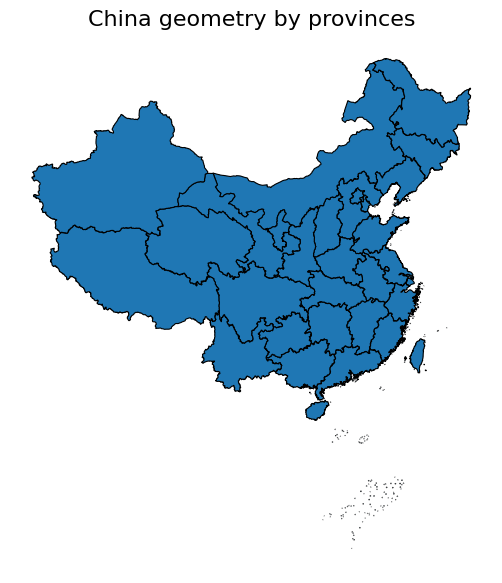

In [10]:
# plot of china geographical locations separated by provinces
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
map_df.plot(ax=ax,linewidth=0.8, edgecolor='0',legend=True,markersize=[39.739192, -104.990337])
ax.set_title("China geometry by provinces", fontdict={'fontsize': '16', 'fontweight' : '10'})
plt.show()

In [11]:
# prep column values to join
df_CHN["province"] = df_CHN["province"].str.lower() # changing to lower case
df_CHN["province"] = df_CHN["province"].replace(["hong kong"],["hongkong"],regex=True) # exclude spacing
df_CHN["province"] = df_CHN["province"].replace(["macau"],["macao"],regex=True) # renaming
map_df["NAME_PINGY"] = map_df["NAME_PINGY"].str.lower().replace(["neimenggu zizhiqu"],["inner mongolia"]) # map inner mongolia to non english province name
map_df["NAME_PINGY"] = map_df["NAME_PINGY"].str.lower().replace(["xizang zizhiqu"],["tibet"]) # map tibet to non english province name
map_df["NAME_PINGY"] = map_df["NAME_PINGY"].str.lower().replace([" shi| sheng| zizhiqu|zhuangzu|weiwu'erzu|huizu"],[""],regex=True)

In [12]:
df_CHN.head()

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
111,2023-03-09,2275,7,0,0,0,0,2023-03-10 04:21:03,2268,0,0.0031,CHN,China,anhui,31.8257,117.2264
112,2023-03-09,40774,20,0,0,0,0,2023-03-10 04:21:03,40754,0,0.0005,CHN,China,beijing,40.1824,116.4142
113,2023-03-09,14715,11,0,0,0,0,2023-03-10 04:21:03,14704,0,0.0007,CHN,China,chongqing,30.0572,107.8740
114,2023-03-09,17122,2,0,0,0,0,2023-03-10 04:21:03,17120,0,0.0001,CHN,China,fujian,26.0789,117.9874
115,2023-03-09,1742,2,0,0,0,0,2023-03-10 04:21:03,1740,0,0.0011,CHN,China,gansu,36.0611,103.8343


In [13]:
map_df.sort_values("NAME_PINGY").head()

,GB,COUNT,SUM_AREA,SUM_PERIME,NAME_PINGY,NMAE_CHINE,X,Y,geometry
11,340000,82,1.401067e+11,1.665334e+07,anhui,°² »Õ,1.145903e+06,-2.613094e+05,"POLYGON ((1333766.875 -318727.281, 1334466.875..."
0,110000,15,1.663132e+10,2.374422e+06,beijing,±± ¾©,9.613544e+05,6.465288e+05,"POLYGON ((951820.688 567831.625, 949230.875 56..."
12,350000,119,1.215032e+11,1.679698e+07,fujian,¸£ ½¨,1.326014e+06,-9.237379e+05,"MULTIPOLYGON (((1307626.250 -1160653.750, 1308..."
26,620000,89,4.041209e+11,2.887701e+07,gansu,¸Ê Ëà,-2.186552e+05,3.149955e+05,"POLYGON ((156139.953 79137.117, 155842.281 801..."
18,440000,185,1.770322e+11,2.334886e+07,guangdong,¹ã ¶«,8.509019e+05,-1.322830e+06,"MULTIPOLYGON (((919051.500 -1382498.625, 91977..."


In [21]:
# Joining df to geodf
feature_of_interest = "confirmed" # column/feature of interest
df_join = map_df.set_index("NAME_PINGY").join(df_CHN.set_index("province")) # join tables with keys: NAME_PINGY, province
list_drop = df_join.columns.tolist()
list_drop.remove(feature_of_interest)
list_drop.remove("geometry") # keep column: geometry
df_join.drop(columns=list_drop,inplace=True)
df_join.dropna(inplace=True) # drop nan values because some provinces are not measured
df_join.head()

,geometry,confirmed
NAME_PINGY,,
beijing,"POLYGON ((951820.688 567831.625, 949230.875 56...",40774.0
tianjin,"POLYGON ((1040181.938 652748.188, 1042009.688 ...",4392.0
hebei,"MULTIPOLYGON (((1158051.375 518894.062, 115706...",3292.0
shanxi,"POLYGON ((661683.188 617970.812, 661304.000 61...",7167.0
inner mongolia,"POLYGON ((1251883.000 2027025.625, 1252366.250...",8847.0


In [15]:
N=2
df_join_top = df_join.sort_values(feature_of_interest,ascending=False).head(N)
df_join_top

,geometry,confirmed
NAME_PINGY,,
hongkong,"MULTIPOLYGON (((930405.875 -1382925.000, 93105...",2876106.0
guangdong,"MULTIPOLYGON (((919051.500 -1382498.625, 91977...",103248.0


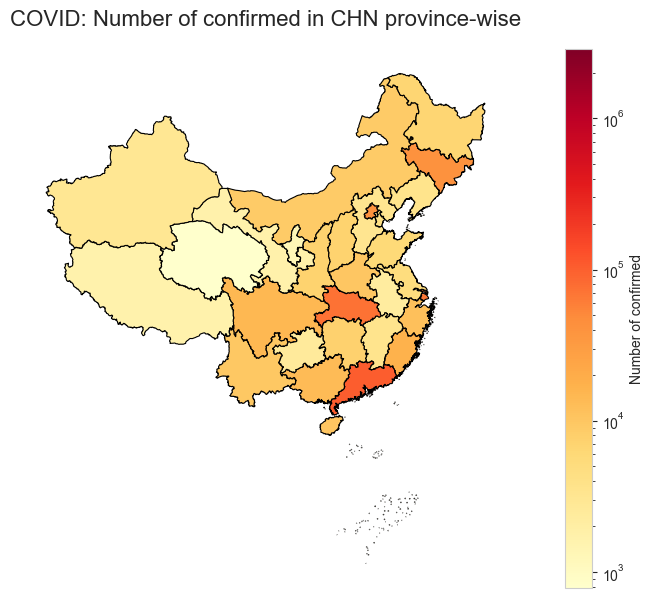

In [22]:
sns.set_style('whitegrid')

#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
ax.set_title('COVID: Number of '+feature_of_interest+' in CHN province-wise', fontdict={'fontsize': '16', 'fontweight' : '10'})

# Plot the figure
df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of "+feature_of_interest},norm=matplotlib.colors.LogNorm(vmin=df_join[feature_of_interest].min(), vmax=df_join[feature_of_interest].max()))
plt.show()

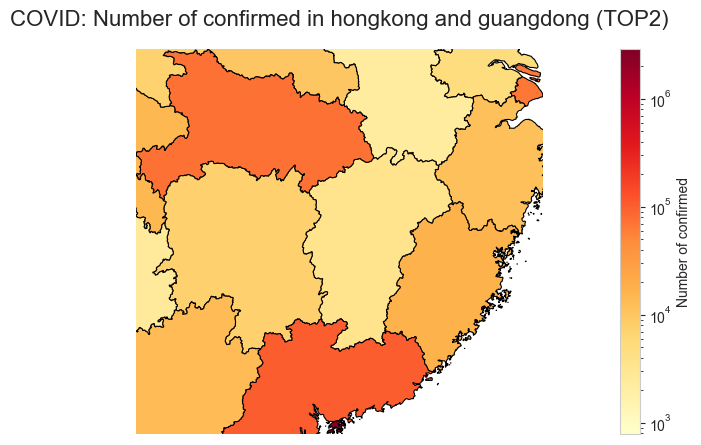

In [23]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.axis('off')
ax.set_title('COVID: Number of '+feature_of_interest+' in hongkong and guangdong (TOP2)', fontdict={'fontsize': '16', 'fontweight' : '10'})

# Set plot limit for better view. Uncomment to see zoomed view (https://gis.stackexchange.com/questions/375582/zoom-to-a-plot-with-geopandas-based-on-data-from-csv-and-shapefile)
minx, miny, maxx, maxy = df_join_top.total_bounds 
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot the figure
df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of "+feature_of_interest},norm=matplotlib.colors.LogNorm(vmin=df_join[feature_of_interest].min(), vmax=df_join[feature_of_interest].max()))
plt.show()

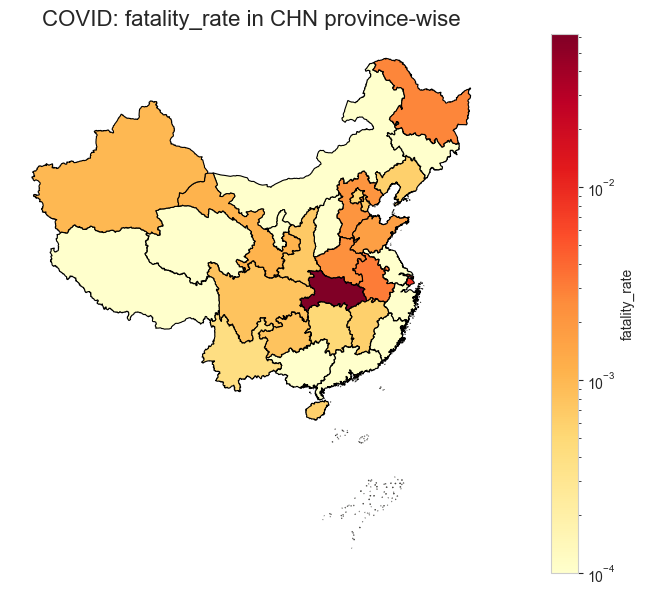

In [24]:
# Joining df to geodf
feature_of_interest = "fatality_rate" # column/feature of interest
df_join = map_df.set_index("NAME_PINGY").join(df_CHN.set_index("province")) # join tables with keys: NAME_PINGY, province
list_drop = df_join.columns.tolist()
list_drop.remove(feature_of_interest)
list_drop.remove("geometry") # keep column: geometry
df_join.drop(columns=list_drop,inplace=True)
# df_join[feature_of_interest] = df_join[feature_of_interest].replace(0,1)
df_join.dropna(inplace=True) # drop nan values because some provinces are not measured
df_join[feature_of_interest] = df_join[feature_of_interest].replace(0,np.nan)
df_join[feature_of_interest] = df_join[feature_of_interest].replace(np.nan,df_join[feature_of_interest][df_join[feature_of_interest].notnull()].min()) # replacing zeros for log scaling

N=4
df_join_top = df_join.sort_values(feature_of_interest,ascending=False).head(N) # zoom to top N for feature_of_interest

sns.set_style('whitegrid')

#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
ax.set_title('COVID: '+feature_of_interest+' in CHN province-wise', fontdict={'fontsize': '16', 'fontweight' : '10'})

# Set plot limit for better view. Uncomment to see zoomed view (https://gis.stackexchange.com/questions/375582/zoom-to-a-plot-with-geopandas-based-on-data-from-csv-and-shapefile)
# minx, miny, maxx, maxy = df_join_top.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

# Plot the figure
# using log scaling as difference between min and max values are in orders of magnitude
df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': feature_of_interest},norm=matplotlib.colors.LogNorm(vmin=df_join[feature_of_interest].min(), vmax=df_join[feature_of_interest].max()))
plt.show()

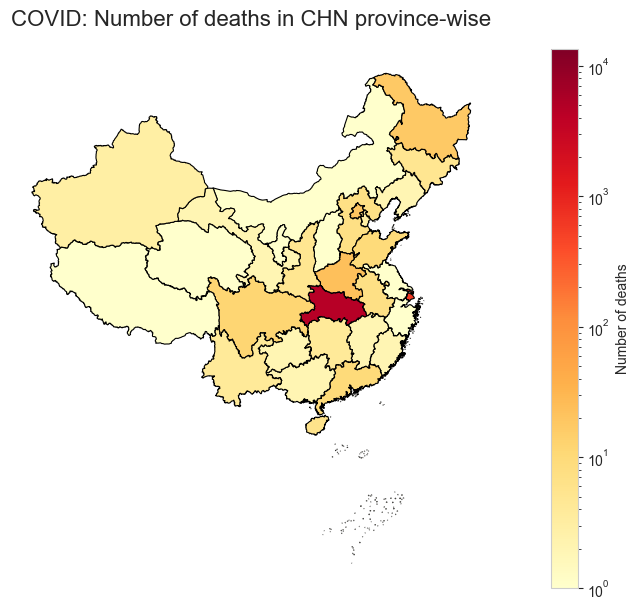

In [25]:
# Joining df to geodf
feature_of_interest = "deaths" # column/feature of interest
df_join = map_df.set_index("NAME_PINGY").join(df_CHN.set_index("province")) # join tables with keys: NAME_PINGY, province
list_drop = df_join.columns.tolist()
list_drop.remove(feature_of_interest)
list_drop.remove("geometry") # keep column: geometry
df_join.drop(columns=list_drop,inplace=True)
df_join[feature_of_interest] = df_join[feature_of_interest].replace(0,1) # replacing zeros for log scaling
df_join.dropna(inplace=True) # drop nan values because some provinces are not measured

N=3
df_join_top = df_join.sort_values(feature_of_interest,ascending=False).head(N) # zoom to top N for feature_of_interest

sns.set_style('whitegrid')

#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
ax.set_title('COVID: Number of '+feature_of_interest+' in CHN province-wise', fontdict={'fontsize': '16', 'fontweight' : '10'})

# Set plot limit for better view. Uncomment to see zoomed view (https://gis.stackexchange.com/questions/375582/zoom-to-a-plot-with-geopandas-based-on-data-from-csv-and-shapefile)
# minx, miny, maxx, maxy = df_join_top.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

# Plot the figure
# using log scaling as difference between min and max values are in orders of magnitude
df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of "+feature_of_interest},norm=matplotlib.colors.LogNorm(vmin=df_join[feature_of_interest].min(), vmax=df_join[feature_of_interest].max()))
plt.show()

In [26]:
#Average population density in China in 2020, by province or region
#https://www.statista.com/statistics/1183370/china-population-density-by-region-province/
CHN_population_density = pd.read_excel(r"D:\git_repo_IO_mini_project1\IOD_mini_project1\statistic_id1183370_population-density-in-china-2020-by-region.xlsx",sheet_name="Data") # rename root directory to your own directory
CHN_population_density.rename({"Unnamed: 0":"drop","Unnamed: 1":"name","Unnamed: 2":"inhabitants/km2"},axis="columns",inplace=True)
CHN_population_density.drop(columns="drop",inplace=True)
CHN_population_density.drop(index=CHN_population_density[CHN_population_density["inhabitants/km2"].isna()].index.tolist(),inplace=True)
CHN_population_density.reset_index(drop=True,inplace=True)
CHN_population_density.loc[len(CHN_population_density)] = ["Hongkong",6746.73] #add hongkong population density according to google
# CHN_population_density.loc[len(CHN_population_density)] = ["Taiwan",649] #add taiwan population density according to google
CHN_population_density.loc[len(CHN_population_density)] = ["Macao",23472] #add macao population density according to google
CHN_population_density["name"] = CHN_population_density["name"].str.lower().replace(["\*"],[""],regex=True)
df_join_pop_den = map_df.set_index("NAME_PINGY").join(CHN_population_density.set_index("name"))
df_join_pop_den = df_join_pop_den.sort_values("inhabitants/km2",ascending=False)
df_join_pop_den.describe()

,GB,COUNT,SUM_AREA,SUM_PERIME,X,Y,inhabitants/km2
count,33.000000,33.000000,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,32.000000
mean,420909.090909,90.151515,2.877227e+11,2.096472e+07,6.646085e+05,-1.921876e+05,1383.318125
std,198011.420699,51.370055,3.764037e+11,1.492734e+07,8.431714e+05,8.607207e+05,4240.076711
min,110000.000000,1.000000,1.542314e+07,1.789793e+04,-1.677291e+06,-1.736691e+06,3.030000
25%,310000.000000,52.000000,1.008392e+11,1.397334e+07,3.346157e+05,-8.997044e+05,125.675000
50%,420000.000000,89.000000,1.673810e+11,2.040993e+07,8.924305e+05,-2.565067e+05,291.950000
75%,540000.000000,119.000000,2.358571e+11,2.526441e+07,1.211254e+06,3.245150e+05,622.725000
max,820000.000000,199.000000,1.636396e+12,5.485877e+07,1.693961e+06,1.681706e+06,23472.000000


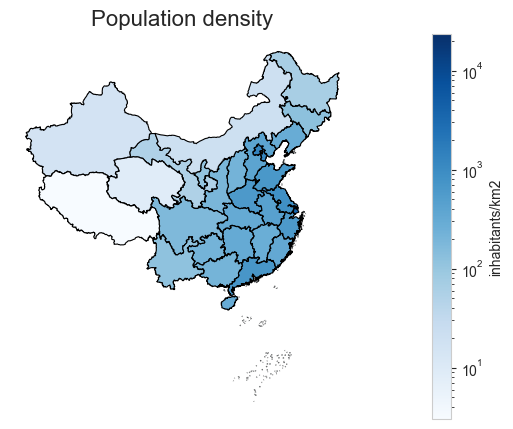

In [33]:
df_join_pop_den = df_join_pop_den[["geometry","inhabitants/km2"]]
df_join_pop_den = df_join_pop_den.dropna()
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.axis('off')

# Set plot limit for better view. Uncomment to see zoomed view (https://gis.stackexchange.com/questions/375582/zoom-to-a-plot-with-geopandas-based-on-data-from-csv-and-shapefile)
# minx, miny, maxx, maxy = df_join_pop_den.head(2).total_bounds 
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

ax.set_title('Population density', fontdict={'fontsize': '16', 'fontweight' : '10'})
df_join_pop_den.plot(column="inhabitants/km2",cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "inhabitants/km2"},norm=matplotlib.colors.LogNorm(vmin=df_join_pop_den["inhabitants/km2"].min(), vmax=df_join_pop_den["inhabitants/km2"].max()))
# df_join_pop_den.plot(column="inhabitants/km2",cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "inhabitants/km2"})
plt.show()

In [42]:
#List of Chinese administrative divisions by GDP
#https://en.wikipedia.org/wiki/List_of_Chinese_administrative_divisions_by_GDP#cite_note-data2022-1
CHN_gdp_province = pd.read_excel(r"D:\git_repo_IO_mini_project1\IOD_mini_project1\statistic_id1183370_population-density-in-china-2020-by-region.xlsx",sheet_name="Data_gdp")
CHN_gdp_province.rename({"Unnamed: 0":"drop","Unnamed: 1":"name","Unnamed: 2":"inhabitants/km2"},axis="columns",inplace=True)
CHN_gdp_province.drop(columns=["Rank"],inplace=True)
CHN_gdp_province
CHN_gdp_province.loc[len(CHN_gdp_province)] = ["Hongkong",2655.65] #add hongkong gdp according to google
CHN_gdp_province.loc[len(CHN_gdp_province)] = ["Macao",216] #add macao gdp according to google
CHN_gdp_province["Province"] = CHN_gdp_province["Province"].str.lower()
CHN_gdp_province
df_join_gdp_province = map_df.set_index("NAME_PINGY").join(CHN_gdp_province.set_index("Province"))
df_join_gdp_province = df_join_gdp_province.sort_values("GDP (CNY)",ascending=False)
df_join_gdp_province.head()

,GB,COUNT,SUM_AREA,SUM_PERIME,NMAE_CHINE,X,Y,geometry,GDP (CNY)
NAME_PINGY,,,,,,,,,
guangdong,440000,185,1.770322e+11,2.334886e+07,¹ã ¶«,8.509019e+05,-1.322830e+06,"MULTIPOLYGON (((919051.500 -1382498.625, 91977...",12911.86
jiangsu,320000,90,1.008392e+11,1.397334e+07,½­ ËÕ,1.303640e+06,-1.201312e+05,"MULTIPOLYGON (((1339952.000 101856.266, 133917...",12287.56
shandong,370000,152,1.540515e+11,2.110645e+07,É½ ¶«,1.211254e+06,2.490674e+05,"MULTIPOLYGON (((1135189.500 412883.844, 113467...",8743.51
zhejiang,330000,163,1.019310e+11,1.538587e+07,Õã ½­,1.480108e+06,-5.352367e+05,"MULTIPOLYGON (((1615124.625 -415042.438, 16139...",7771.54
henan,410000,130,1.652419e+11,2.194960e+07,ºÓ ÄÏ,7.741621e+05,-8.225209e+04,"POLYGON ((792891.500 189651.266, 793652.688 19...",6134.51


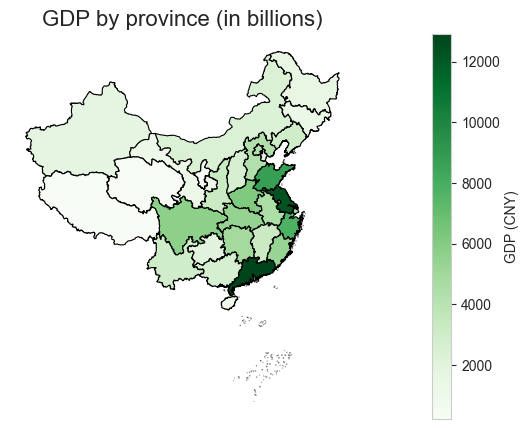

In [41]:
df_join_gdp_province = df_join_gdp_province[["geometry","GDP (CNY)"]]
# df_join_pop_den["inhabitants/km2"] = df_join_pop_den["inhabitants/km2"].replace(np.nan,1)
df_join_gdp_province = df_join_gdp_province.dropna()
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.axis('off')

# Set plot limit for better view. Uncomment to see zoomed view (https://gis.stackexchange.com/questions/375582/zoom-to-a-plot-with-geopandas-based-on-data-from-csv-and-shapefile)
# minx, miny, maxx, maxy = df_join_gdp_province.head(3).total_bounds 
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

ax.set_title('GDP by province (in billions)', fontdict={'fontsize': '16', 'fontweight' : '10'})
# df_join_gdp_province.plot(column="GDP (CNY)",cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "GDP (CNY)"},norm=matplotlib.colors.LogNorm(vmin=df_join_gdp_province["GDP (CNY)"].min(), vmax=df_join_gdp_province["GDP (CNY)"].max()))
df_join_gdp_province.plot(column="GDP (CNY)",cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "GDP (CNY)"})
plt.show()

In [110]:
# Exploring total confirmed, total deaths, fatality rate grouped by country name

df_groupby = df_merged_report.groupby("name").agg({"confirmed":"sum","deaths":"sum"}) # total confirmed cases and total deaths group by country name
df_groupby.reset_index(inplace=True) # reset index
df_groupby.rename(columns={"confirmed":"total_confirmed","deaths":"total_deaths"},inplace=True) # rename columns
df_groupby["fatality_rate"] = df_groupby["total_deaths"]/df_groupby["total_confirmed"]
df_groupby.head()

,name,total_confirmed,total_deaths,fatality_rate
0,Afghanistan,209451,7896,0.037699
1,Albania,334457,3598,0.010758
2,Algeria,271496,6881,0.025345
3,Andorra,47890,165,0.003445
4,Angola,105288,1933,0.018359


In [ ]:
profile = ProfileReport(df_groupby, title="Profiling Report")
profile.to_file("groupby_name_profiling_report.html")

In [114]:
N = 10
df_groupby = df_groupby.sort_values("fatality_rate",ascending=False) # sort by descending total confirmed cases
df_topN = df_groupby.head(N) # top N
df_topN

,name,total_confirmed,total_deaths,fatality_rate
105,MS Zaandam,9,2,0.222222
193,Yemen,11945,2159,0.180745
166,Sudan,63829,5017,0.078601
170,Syria,57467,3164,0.055058
161,Somalia,27324,1361,0.049810
138,Peru,4487553,219539,0.048922
53,Egypt,515759,24812,0.048108
115,Mexico,7483444,333188,0.044523
21,Bosnia and Herzegovina,401729,16280,0.040525
0,Afghanistan,209451,7896,0.037699


In [105]:
df_world_energy = pd.read_csv(r"D:\git_repo_IO_mini_project1\IOD_mini_project1\owid-energy-data.csv")
df_world_energy = df_world_energy[['country',
                                     'year',
                                     'iso_code',
                                     'population',
                                     'gdp',
                                     'biofuel_consumption',
                                     'electricity_demand',
                                     'primary_energy_consumption',]]
df_world_energy = df_world_energy[df_world_energy["year"]==df_world_energy["year"].max()]
df_world_energy

,country,year,iso_code,population,gdp,biofuel_consumption,electricity_demand,primary_energy_consumption
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,1225.20,NaN
267,Africa,2022,NaN,1.426737e+09,NaN,1.122,NaN,5626.826
325,Africa (EI),2022,NaN,NaN,NaN,1.122,NaN,5626.826
348,Africa (Ember),2022,NaN,NaN,NaN,NaN,895.62,NaN
710,Algeria,2022,DZA,4.490323e+07,NaN,NaN,NaN,684.870
...,...,...,...,...,...,...,...,...
21318,Vietnam,2022,VNM,9.818686e+07,NaN,NaN,264.85,1274.762
21466,Western Africa (EI),2022,NaN,NaN,NaN,NaN,NaN,846.876
21631,World,2022,NaN,7.975105e+09,NaN,1199.207,28527.76,167787.672
21674,Yemen,2022,YEM,3.369661e+07,NaN,NaN,NaN,NaN


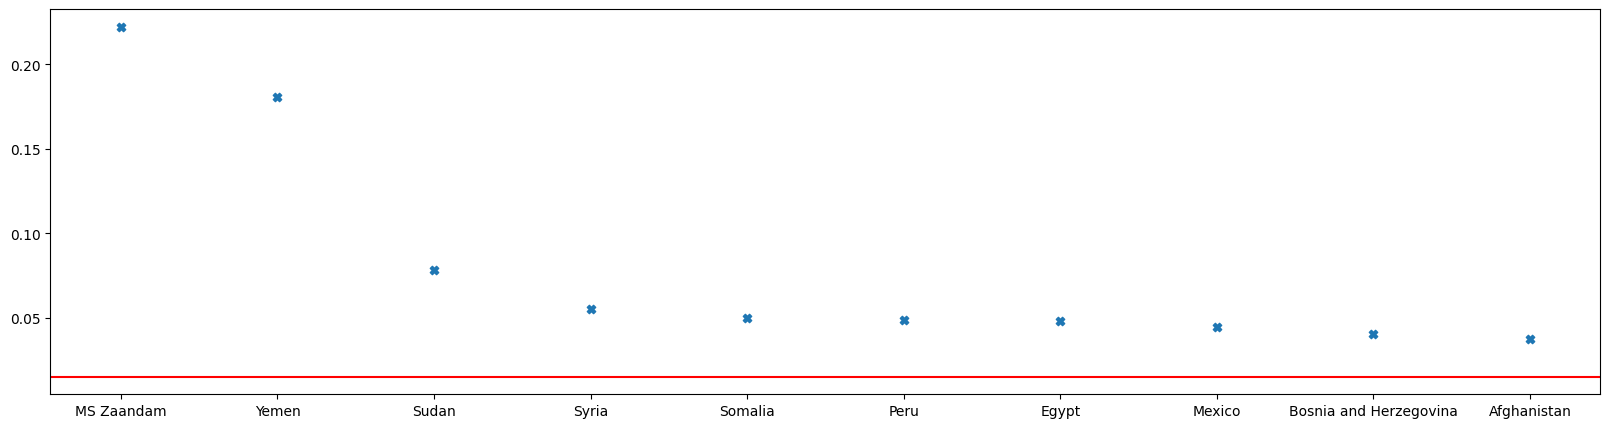

In [119]:
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.scatter(df_topN["name"],df_topN["fatality_rate"],marker="X")
plt.axhline(y=df_groupby["fatality_rate"].mean(),color="red") # line plot of world mean fatality  rate
plt.show()